In [1]:
#Gerekli kütüphanelerin import edilmesi
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Veri seti import edilmesi
data = pd.read_excel("DiyabetTahminlemesiICDOlmayan.xlsx")

In [3]:
#Veri setine ilk bakış
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190370 entries, 0 to 190369
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   HastaId           190370 non-null  int64         
 1   ProtokolNo        190370 non-null  int64         
 2   CinsiyetId        190370 non-null  object        
 3   HastaDogumTarihi  190370 non-null  datetime64[ns]
 4   Yas               190370 non-null  int64         
 5   GelisTipi         190370 non-null  object        
 6   BransAdi          190370 non-null  object        
 7   AcilisTarihi      190370 non-null  datetime64[ns]
 8   KapanisTarihi     174158 non-null  datetime64[ns]
 9   EkIslemAdi        190370 non-null  object        
 10  LoincKodu         190370 non-null  object        
 11  EkSonucText       190370 non-null  float64       
 12  EkOnayTarihi      190370 non-null  datetime64[ns]
 13  IstekTarihi       190370 non-null  datetime64[ns]
 14  ICDK

In [4]:
data.head()

,HastaId,ProtokolNo,CinsiyetId,HastaDogumTarihi,Yas,GelisTipi,BransAdi,AcilisTarihi,KapanisTarihi,EkIslemAdi,LoincKodu,EkSonucText,EkOnayTarihi,IstekTarihi,ICDKodu,YatisGun,GebelikSayisi,Tansiyon,Soygecmis,BMI
0,18317,4854170,E,1955-01-04,66,Y,Üroloji,2017-11-10 09:09:59.999996,2017-11-10 16:29:00.000004,"Glukoz, açlık",2345-7,89.5,2017-11-08 16:48:59.999996,2017-11-08 15:47:59.999997,"N40,R33,N30.8,C67.9,J06.9,",0.0,NaN,113 / 56,"Özellik yok,",NaN
1,18515,1426013,K,1958-01-01,63,Y,Göz Hastalıkları,2014-05-07 07:48:00.000000,2014-05-07 13:02:00.000004,"Glukoz, açlık,",2345-7,106.9,2014-05-06 12:42:59.999999,2014-05-06 10:36:59.999999,"H25.1,",0.0,NaN,NaN,"-, özellik yok, özellik yok, *, *, özellik yok,",NaN
2,18963,2005522,K,1963-11-01,58,Y,İç Hastalıkları,2014-12-09 10:43:59.999998,2014-12-09 11:26:59.999997,"Glukoz, açlık,",2345-7,132.4,2014-12-09 11:51:00.000000,2014-12-09 10:41:00.000001,"K52.8,",0.0,NaN,NaN,"ÖZELLİK YOK.,",NaN
3,19084,3935087,K,1943-05-07,78,Y,Göz Hastalıkları,2016-11-22 08:03:00.000003,2016-11-22 10:18:00.000003,"Glukoz, tokluk",2345-7,97.7,2016-11-17 15:31:00.000002,2016-11-17 14:23:00.000004,"H25.1,H52.1,H52.2,",0.0,NaN,NaN,"özellik yok ,",NaN
4,19256,4188918,K,1950-02-24,71,G,Tıbbi Onkoloji,2017-02-22 07:52:59.999998,2017-02-22 15:04:59.999998,"Glukoz, açlık",2345-7,251.7,2017-02-22 09:09:00.000000,2017-02-22 07:52:59.999998,"C38.4,K21,",0.0,NaN,120 / 76,"Özellik yok.,",NaN


In [5]:
#Birden fazla HastaId olduğu için bunları sıralayıp, ilk benzersiz HastaId çekme işlemi 
data.sort_values("HastaId", inplace = True)

# HastaId dublicate değerlerin silinmesi
data.drop_duplicates(subset ="HastaId",
                     keep = 'first', inplace = True)

# Index resetleme
data.reset_index(drop = True, inplace = True)

In [6]:
#İşlemden sonra veri setinin yeni boyutu
data.shape

(53762, 20)

In [7]:
# Veri setinde ihtiyacımız olmayan sütunları silmek için değişkenlerin incelenmesi
data.columns

Index(['HastaId', 'ProtokolNo', 'CinsiyetId', 'HastaDogumTarihi', 'Yas',
       'GelisTipi', 'BransAdi', 'AcilisTarihi', 'KapanisTarihi', 'EkIslemAdi',
       'LoincKodu', 'EkSonucText', 'EkOnayTarihi', 'IstekTarihi', 'ICDKodu',
       'YatisGun', 'GebelikSayisi', 'Tansiyon', 'Soygecmis', 'BMI'],
      dtype='object')

In [8]:
# Gereksiz sütunların silinmesi
data.drop(["HastaId", "ProtokolNo", "HastaDogumTarihi", "BransAdi","AcilisTarihi", "KapanisTarihi", "LoincKodu", "EkOnayTarihi",
          "IstekTarihi", "GebelikSayisi", "Soygecmis", "BMI"], axis = 1, inplace = True)

In [9]:
data.head()

,CinsiyetId,Yas,GelisTipi,EkIslemAdi,EkSonucText,ICDKodu,YatisGun,Tansiyon
0,K,34,Y,"Glukoz, açlık,",112.1,"K52,",0.0,NaN
1,K,35,Y,"Glukoz, açlık,",109.9,"J06,N39.0,J18.9,",0.0,NaN
2,K,32,Y,"Glukoz, açlık,",92.6,"G40.2,",1.0,127 / 69
3,E,66,Y,"Glukoz, açlık",89.5,"N40,R33,N30.8,C67.9,J06.9,",0.0,113 / 56
4,K,68,Y,"Glukoz, açlık",119.6,"N95.0,D25,",1.0,120 / 80


## Target Belirleme
* ICD koduda "E" ile başlayan koda sahip her hasta diyabet hastasıdır.

In [10]:
#ICD Kodunda "E" ile başlayan değerleri bulmak için ilk olarak "," karakterine göre ayrılır.
data["ICD_new"] = [i.split(",") for i in data["ICDKodu"]]

In [11]:
# Eğer ICD kodu "E" harfi ile başladıysa target değişkenine 1 atanır. Yok ise 0 atanır.
data["Target"] = ""
for i in range(len(data)):
    for j in data["ICD_new"][i]:
        if j.startswith("E"):
            data["Target"][i] = "1"
            break
        else:
            data["Target"][i] = "0"

In [12]:
# Diyabetli olan ve olmayan hastaların sayısı
data["Target"].value_counts()

0    48461
1     5301
Name: Target, dtype: int64

## EkIslem Sonucuna Göre Target Belirleme
* Hastanın diyabet olup olmamasını belirlerken ICD kodunu kullanmıştık. Fakat bazı durumlarda tanı konuşmamış hastalar da diyabetli olabilir. 
* Bunu belirlemek için test sonuçlarını inceleyeceğiz. Eğer bir hastanın glikoz test sonucu normal değerin üzerinde ise diyabet hastası olarak etiketlendireceğiz. 
* Veri setinde farklı türde testler yapılmıştır. Bu testlerin içinden glikoz açlık testini seçiyoruz.

In [13]:
# Test sonucu glikoz açlık olan hastaların id'sini çektik.
indexler = []
for i in range(len(data)):
    if data["EkIslemAdi"][i] == "Glukoz, açlık" or data["EkIslemAdi"][i] == "Glukoz, açlık,":
        indexler.append(i)

data = data.iloc[indexler]
data.reset_index(drop = True)

,CinsiyetId,Yas,GelisTipi,EkIslemAdi,EkSonucText,ICDKodu,YatisGun,Tansiyon,ICD_new,Target
0,K,34,Y,"Glukoz, açlık,",112.1,"K52,",0.0,NaN,"[K52, ]",0
1,K,35,Y,"Glukoz, açlık,",109.9,"J06,N39.0,J18.9,",0.0,NaN,"[J06, N39.0, J18.9, ]",0
2,K,32,Y,"Glukoz, açlık,",92.6,"G40.2,",1.0,127 / 69,"[G40.2, ]",0
3,E,66,Y,"Glukoz, açlık",89.5,"N40,R33,N30.8,C67.9,J06.9,",0.0,113 / 56,"[N40, R33, N30.8, C67.9, J06.9, ]",0
4,K,68,Y,"Glukoz, açlık",119.6,"N95.0,D25,",1.0,120 / 80,"[N95.0, D25, ]",0
...,...,...,...,...,...,...,...,...,...,...
51975,E,61,Y,"Glukoz, açlık",97.0,"D40.0,N40,",0.0,128 / 71,"[D40.0, N40, ]",0
51976,E,43,Y,"Glukoz, açlık",83.0,"H66.3,",1.0,113 / 65,"[H66.3, ]",0
51977,E,75,Y,"Glukoz, açlık,",229.0,"R06.0,J18.9,I50.9,I10,",0.0,NaN,"[R06.0, J18.9, I50.9, I10, ]",0
51978,E,47,Y,"Glukoz, açlık,",89.0,"R55,I67.8,R00.2,",0.0,NaN,"[R55, I67.8, R00.2, ]",0


In [14]:
# Artık bu sütunla bir işimiz kalmamıştır. Bu yüzden sütunu siliyoruz.
data.drop(["EkIslemAdi"], axis = 1, inplace = True)

In [15]:
# Test sonuçlarının olduğu değişkende outlier detection işlemi
from collections import Counter
aykiri_indexler=[]

Q1 = data["EkSonucText"].quantile(0.25)
Q3 = data["EkSonucText"].quantile(0.75)
IQR = Q3 -Q1
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR
filtre = ((data["EkSonucText"] < alt_sinir) | (data["EkSonucText"] > ust_sinir))
aykiri_gozlemler = data["EkSonucText"][filtre]
aykiri_index = aykiri_gozlemler.index
aykiri_indexler.extend(aykiri_index)
aykiri_indexler = Counter(aykiri_indexler)

In [16]:
data.shape

(51980, 9)

In [17]:
data = data.drop(aykiri_indexler,axis=0).reset_index(drop=True)

In [18]:
data.shape

(46928, 9)

In [19]:
# Bir hastanın test sonucu 125' eşit veya küçükse normal, büyük ise diyabet olarak etiketliyoruz.
data["Deger_Etiket"] = None
for i in range(len(data)):
    if (data["EkSonucText"][i] <= 125):
        data["Deger_Etiket"][i] = "Normal"
    else:
         data["Deger_Etiket"][i] = "Diyabet"

In [20]:
# Deger Etiketi diyabet olanların Target değerini 1 olarak değiştiriyoruz.
for i in range(len(data)):
    if data["Deger_Etiket"][i] == "Diyabet":
        data["Target"][i] = 1
    else:
        pass

In [21]:
data["Target"] = data["Target"].astype(int)
data["Target"].value_counts()

0    34291
1    12637
Name: Target, dtype: int64

## Yas Gruplandırma
* Yaş değişkeninden daha anlamlı sonuçlar çıkarmak için yaşları gruplandırdık. 
* Yaş Grupları = 0-17:ergen 18-65:genç 66-79:orta yaş 80-120:yaşlı

In [22]:
data['Yas_Sinif'] = pd.cut(x = data['Yas'], bins = [0,17,65, 79, 120], labels = ["ergen", "genç", "orta yaş","yaşlı"])

In [23]:
data

,CinsiyetId,Yas,GelisTipi,EkSonucText,ICDKodu,YatisGun,Tansiyon,ICD_new,Target,Deger_Etiket,Yas_Sinif
0,K,34,Y,112.1,"K52,",0.0,NaN,"[K52, ]",0,Normal,genç
1,K,35,Y,109.9,"J06,N39.0,J18.9,",0.0,NaN,"[J06, N39.0, J18.9, ]",0,Normal,genç
2,K,32,Y,92.6,"G40.2,",1.0,127 / 69,"[G40.2, ]",0,Normal,genç
3,E,66,Y,89.5,"N40,R33,N30.8,C67.9,J06.9,",0.0,113 / 56,"[N40, R33, N30.8, C67.9, J06.9, ]",0,Normal,orta yaş
4,K,68,Y,119.6,"N95.0,D25,",1.0,120 / 80,"[N95.0, D25, ]",0,Normal,orta yaş
...,...,...,...,...,...,...,...,...,...,...,...
46923,E,60,Y,93.0,"C18.9,",0.0,161 / 80,"[C18.9, ]",0,Normal,genç
46924,E,61,Y,97.0,"D40.0,N40,",0.0,128 / 71,"[D40.0, N40, ]",0,Normal,genç
46925,E,43,Y,83.0,"H66.3,",1.0,113 / 65,"[H66.3, ]",0,Normal,genç
46926,E,47,Y,89.0,"R55,I67.8,R00.2,",0.0,NaN,"[R55, I67.8, R00.2, ]",0,Normal,genç


In [24]:
# Yaş Sınıflarının değerleri
data["Yas_Sinif"].value_counts()

genç        25272
orta yaş     9868
ergen        8269
yaşlı        3505
Name: Yas_Sinif, dtype: int64

## Tansiyon Değişkeni Boş Değerlerinin Doldurulması
* İlk olarak excel ortamında Tansiyon değişkenini "/" karakterine göre bölüp Büyük_Tansiyon ve Kücük_Tansiyon olmak üzere iki değişken oluşturulmuştur.
* Bu işlemden sonra yaş ve cinsiyete göre boş tansiyon değerlerine veri setinin mod değeri atanacaktır.
* Ayrıca excel üzerinde ICD kodlarına göre hastaların hipertansiyon ve obezite hastası olup olmadığını görmek için iki yeni değişken oluşturulmuştur.

In [26]:
#Yaşı 0 olanların silinmesi
data["Yas"] = data["Yas"].astype("int")

x = data[data["Yas"] == 0].index
data = data.drop(x, axis = 0).reset_index(drop = True)

In [27]:
# Büyük Tansiyon değeri boş olan indexler seçildi
id_ = data[data["Büyük_Tansiyon"].isnull()].index

In [28]:
#Büyük Tansiyon değerinin yaş ve cinsiyete göre gruplandırılıp en sık kullanılan değerler bulunmuştur.
from scipy import stats
data.groupby(["Yas_Sinif", "CinsiyetId"])["Büyük_Tansiyon"].apply(lambda x: stats.mode(x)[0][0]).reset_index()

,Yas_Sinif,CinsiyetId,Büyük_Tansiyon
0,ergen,E,110.0
1,ergen,K,100.0
2,genç,E,120.0
3,genç,K,120.0
4,orta yaş,E,120.0
5,orta yaş,K,120.0
6,yaşlı,E,140.0
7,yaşlı,K,130.0


In [29]:
# En sık kullanılan değerler yaş ve cinsiyet grubuna göre atanmıştır.
for i in id_:
    if (data["CinsiyetId"][i] == "E" and data["Yas_Sinif"][i] == "ergen"):
        data["Büyük_Tansiyon"][i] = 110
    elif (data["CinsiyetId"][i] == "K" and data["Yas_Sinif"][i] == "ergen"):
        data["Büyük_Tansiyon"][i] = 100
        
    elif data["Yas_Sinif"][i] == "genç":
        data["Büyük_Tansiyon"][i] = 120
    
    elif data["Yas_Sinif"][i] == "orta yaş":
        data["Büyük_Tansiyon"][i] = 120
        
    elif data["CinsiyetId"][i] == "E" and data["Yas_Sinif"][i] == "yaşlı":
        data["Büyük_Tansiyon"][i] = 140
        
    elif data["CinsiyetId"][i] == "K" and data["Yas_Sinif"][i] == "yaşlı":
        data["Büyük_Tansiyon"][i] = 130

In [30]:
# Büyük Tansiyon değişkeninde boş değer kalmamıştır.
data["Büyük_Tansiyon"].isnull().sum()

0

In [31]:
#Küçük Tansiyon boş olanların id'si
id_ = data[data["Küçük_Tansiyon"].isnull()].index

In [32]:
#Küçük Tansiyon değerinin yaş ve cinsiyete göre gruplandırılıp en sık kullanılan değerler bulunmuştur.
from scipy import stats
data.groupby(["Yas_Sinif", "CinsiyetId"])["Küçük_Tansiyon"].apply(lambda x: stats.mode(x)[0][0]).reset_index()

,Yas_Sinif,CinsiyetId,Küçük_Tansiyon
0,ergen,E,60.0
1,ergen,K,60.0
2,genç,E,70.0
3,genç,K,70.0
4,orta yaş,E,80.0
5,orta yaş,K,80.0
6,yaşlı,E,74.0
7,yaşlı,K,68.0


In [33]:
# En sık kullanılan değerler yaş ve cinsiyet grubuna göre atanmıştır.
for i in id_:
    if data["Yas_Sinif"][i] == "ergen":
        data["Küçük_Tansiyon"][i] = 60
        
    elif data["Yas_Sinif"][i] == "genç":
        data["Küçük_Tansiyon"][i] = 70
    
    elif data["Yas_Sinif"][i] == "orta yaş":
        data["Küçük_Tansiyon"][i] = 80
        
    elif data["CinsiyetId"][i] == "E" and data["Yas_Sinif"][i] == "yaşlı":
        data["Küçük_Tansiyon"][i] = 74
        
    elif data["CinsiyetId"][i] == "K" and data["Yas_Sinif"][i] == "yaşlı":
        data["Küçük_Tansiyon"][i] = 68

In [34]:
#Küçük Tansiyon değişkeninde boş değer kalmamıştır.
data["Küçük_Tansiyon"].isnull().sum()

0

## Tansiyon Değeri Ayarlanması
* Cinsiyet ve yaş değişkenine göre tansiyon değerlerini normal, düşük ve yüksek olarak etiketlendireceğiz.

In [35]:
data["Büyük_Deger"] = None
#Cinsiyet E - Büyük Tansiyon
for i in range(len(data)):
    if data["CinsiyetId"][i] == "E":
        if 21 <= data["Yas"][i] <= 25:
            if 90 <= data["Büyük_Tansiyon"][i] <= 120.5:
                data["Büyük_Deger"][i] = "Normal"
            elif data["Büyük_Tansiyon"][i] > 120.5:
                data["Büyük_Deger"][i] = "Yüksek"
            elif data["Büyük_Tansiyon"][i] < 90:
                data["Büyük_Deger"][i] = "Düsük"
        elif 26 <= data["Yas"][i] <= 30:
            if 90 <= data["Büyük_Tansiyon"][i] <= 119.5:
                data["Büyük_Deger"][i] = "Normal"
            elif data["Büyük_Tansiyon"][i] > 119.5:
                data["Büyük_Deger"][i] = "Yüksek"
            elif data["Büyük_Tansiyon"][i] < 90:
                data["Büyük_Deger"][i] = "Düsük"
        elif 31 <= data["Yas"][i] <= 35:
            if 90 <= data["Büyük_Tansiyon"][i] <= 114.5:
                data["Büyük_Deger"][i] = "Normal"
            elif data["Büyük_Tansiyon"][i] > 114.5:
                data["Büyük_Deger"][i] = "Yüksek"
            elif data["Büyük_Tansiyon"][i] < 90:
                data["Büyük_Deger"][i] = "Düsük"
        elif 36 <= data["Yas"][i] <= 40:
            if 90 <= data["Büyük_Tansiyon"][i] <= 120.5:
                data["Büyük_Deger"][i] = "Normal"
            elif data["Büyük_Tansiyon"][i] > 120.5:
                data["Büyük_Deger"][i] = "Yüksek"
            elif data["Büyük_Tansiyon"][i] < 90:
                data["Büyük_Deger"][i] = "Düsük"

        elif 41 <= data["Yas"][i] <= 45:
            if 90 <= data["Büyük_Tansiyon"][i] <= 115.5:
                data["Büyük_Deger"][i] = "Normal"
            elif data["Büyük_Tansiyon"][i] > 115.5:
                data["Büyük_Deger"][i] = "Yüksek"
            elif data["Büyük_Tansiyon"][i] < 90:
                data["Büyük_Deger"][i] = "Düsük"
      
        elif 46 <= data["Yas"][i] <= 50:
            if 90 <= data["Büyük_Tansiyon"][i] <= 119.5:
                data["Büyük_Deger"][i] = "Normal"
            elif data["Büyük_Tansiyon"][i] > 119.5:
                data["Büyük_Deger"][i] = "Yüksek"
            elif data["Büyük_Tansiyon"][i] < 90:
                data["Büyük_Deger"][i] = "Düsük"
        
                
        elif 51 <= data["Yas"][i] <= 55:
            if 90 <= data["Büyük_Tansiyon"][i] <= 125.5:
                data["Büyük_Deger"][i] = "Normal"
            elif data["Büyük_Tansiyon"][i] > 125.5:
                data["Büyük_Deger"][i] = "Yüksek"
            elif data["Büyük_Tansiyon"][i] < 90:
                data["Büyük_Deger"][i] = "Düsük"
     
        elif 56 <= data["Yas"][i] <= 60:
            if 90 <= data["Büyük_Tansiyon"][i] <= 129.5:
                data["Büyük_Deger"][i] = "Normal"
            elif data["Büyük_Tansiyon"][i] > 129.5:
                data["Büyük_Deger"][i] = "Yüksek"
            elif data["Büyük_Tansiyon"][i] < 90:
                data["Büyük_Deger"][i] = "Düsük"
        
        elif 61 <= data["Yas"][i] <= 65:
            if 90 <= data["Büyük_Tansiyon"][i] <= 143.5:
                data["Büyük_Deger"][i] = "Normal"
            elif data["Büyük_Tansiyon"][i] > 143.5:
                data["Büyük_Deger"][i] = "Yüksek"
            elif data["Büyük_Tansiyon"][i] < 90:
                data["Büyük_Deger"][i] = "Düsük"

In [36]:
#Cinsiyet E - Küçük Tansiyon
data["Kücük_Deger"] = None
for i in range(len(data)):
    if data["CinsiyetId"][i] == "E":
        if 21 <= data["Yas"][i] <= 25:
            if 60 <= data["Küçük_Tansiyon"][i] <=78.5:
                data["Kücük_Deger"][i] = "Normal"
            elif data["Küçük_Tansiyon"][i] > 78.5:
                data["Kücük_Deger"][i] = "Yüksek"
            elif data["Küçük_Tansiyon"][i] < 60:
                data["Kücük_Deger"][i] = "Düsük"
                
        elif 26 <= data["Yas"][i] <= 30:
            if 60 <= data["Küçük_Tansiyon"][i] <=76.5:
                data["Kücük_Deger"][i] = "Normal"
            elif data["Küçük_Tansiyon"][i] > 76.5:
                data["Kücük_Deger"][i] = "Yüksek"
            elif data["Küçük_Tansiyon"][i] < 60:
                data["Kücük_Deger"][i] = "Düsük"
                
        elif 31 <= data["Yas"][i] <= 35:
            if 60 <= data["Küçük_Tansiyon"][i] <=75.5:
                data["Kücük_Deger"][i] = "Normal"
            elif data["Küçük_Tansiyon"][i] > 75.5:
                data["Kücük_Deger"][i] = "Yüksek"
            elif data["Küçük_Tansiyon"][i] < 60:
                data["Kücük_Deger"][i] = "Düsük"
                
        elif 36 <= data["Yas"][i] <= 40:
            if 60 <= data["Küçük_Tansiyon"][i] <=75.5:
                data["Kücük_Deger"][i] = "Normal"
            elif data["Küçük_Tansiyon"][i] > 75.5:
                data["Kücük_Deger"][i] = "Yüksek"
            elif data["Küçük_Tansiyon"][i] < 60:
                data["Kücük_Deger"][i] = "Düsük"
                
        elif 41 <= data["Yas"][i] <= 45:
            if 60 <= data["Küçük_Tansiyon"][i] <=78.5:
                data["Kücük_Deger"][i] = "Normal"
            elif data["Küçük_Tansiyon"][i] > 78.5:
                data["Kücük_Deger"][i] = "Yüksek"
            elif data["Küçük_Tansiyon"][i] < 60:
                data["Kücük_Deger"][i] = "Düsük"
                
        elif 46 <= data["Yas"][i] <= 50:
            if 60 <= data["Küçük_Tansiyon"][i] <= 80.5:
                data["Kücük_Deger"][i] = "Normal"
            elif data["Küçük_Tansiyon"][i] > 80.5:
                data["Kücük_Deger"][i] = "Yüksek"
            elif data["Küçük_Tansiyon"][i] < 60:
                data["Kücük_Deger"][i] = "Düsük"
                
        elif 51 <= data["Yas"][i] <= 55:
            if 60 <= data["Küçük_Tansiyon"][i] <= 80.5:
                data["Kücük_Deger"][i] = "Normal"
            elif data["Küçük_Tansiyon"][i] > 80.5:
                data["Kücük_Deger"][i] = "Yüksek"
            elif data["Küçük_Tansiyon"][i] < 60:
                data["Kücük_Deger"][i] = "Düsük"
                
        elif 56 <= data["Yas"][i] <= 60:
            if 60 <= data["Küçük_Tansiyon"][i] <=79.5:
                data["Kücük_Deger"][i] = "Normal"
            elif data["Küçük_Tansiyon"][i] > 79.5:
                data["Kücük_Deger"][i] = "Yüksek"
            elif data["Küçük_Tansiyon"][i] < 60:
                data["Kücük_Deger"][i] = "Düsük"
                
        elif 61 <= data["Yas"][i] <= 65:
            if 60 <= data["Küçük_Tansiyon"][i] <= 76.5:
                data["Kücük_Deger"][i] = "Normal"
            elif data["Küçük_Tansiyon"][i] > 76.5:
                data["Kücük_Deger"][i] = "Yüksek"
            elif data["Küçük_Tansiyon"][i] < 60:
                data["Kücük_Deger"][i] = "Düsük"

In [37]:
# Cinsiyet K - Büyük Deger
for i in range(len(data)):
    if data["CinsiyetId"][i] == "K":
        if 21 <= data["Yas"][i] <= 25:
            if 90 <= data["Büyük_Tansiyon"][i] <= 115.5:
                data["Büyük_Deger"][i] = "Normal"
            elif data["Büyük_Tansiyon"][i] > 115.5:
                data["Büyük_Deger"][i] = "Yüksek"
            elif data["Büyük_Tansiyon"][i] < 90:
                data["Büyük_Deger"][i] = "Düsük"
        elif 26 <= data["Yas"][i] <= 30:
            if 90 <= data["Büyük_Tansiyon"][i] <= 113.5:
                data["Büyük_Deger"][i] = "Normal"
            elif data["Büyük_Tansiyon"][i] > 113.5:
                data["Büyük_Deger"][i] = "Yüksek"
            elif data["Büyük_Tansiyon"][i] < 90:
                data["Büyük_Deger"][i] = "Düsük"
        elif 31 <= data["Yas"][i] <= 35:
            if 90 <= data["Büyük_Tansiyon"][i] <= 110.5:
                data["Büyük_Deger"][i] = "Normal"
            elif data["Büyük_Tansiyon"][i] > 110.5:
                data["Büyük_Deger"][i] = "Yüksek"
            elif data["Büyük_Tansiyon"][i] < 90:
                data["Büyük_Deger"][i] = "Düsük"
        elif 36 <= data["Yas"][i] <= 40:
            if 90 <= data["Büyük_Tansiyon"][i] <= 112.5:
                data["Büyük_Deger"][i] = "Normal"
            elif data["Büyük_Tansiyon"][i] > 112.5:
                data["Büyük_Deger"][i] = "Yüksek"
            elif data["Büyük_Tansiyon"][i] < 90:
                data["Büyük_Deger"][i] = "Düsük"

        elif 41 <= data["Yas"][i] <= 45:
            if 90 <= data["Büyük_Tansiyon"][i] <= 116.5:
                data["Büyük_Deger"][i] = "Normal"
            elif data["Büyük_Tansiyon"][i] > 116.5:
                data["Büyük_Deger"][i] = "Yüksek"
            elif data["Büyük_Tansiyon"][i] < 90:
                data["Büyük_Deger"][i] = "Düsük"
      
        elif 46 <= data["Yas"][i] <= 50:
            if 90 <= data["Büyük_Tansiyon"][i] <= 124:
                data["Büyük_Deger"][i] = "Normal"
            elif data["Büyük_Tansiyon"][i] > 124:
                data["Büyük_Deger"][i] = "Yüksek"
            elif data["Büyük_Tansiyon"][i] < 90:
                data["Büyük_Deger"][i] = "Düsük"
        
                
        elif 51 <= data["Yas"][i] <= 55:
            if 90 <= data["Büyük_Tansiyon"][i] <= 122.5:
                data["Büyük_Deger"][i] = "Normal"
            elif data["Büyük_Tansiyon"][i] > 122.5:
                data["Büyük_Deger"][i] = "Yüksek"
            elif data["Büyük_Tansiyon"][i] < 90:
                data["Büyük_Deger"][i] = "Düsük"
     
        elif 56 <= data["Yas"][i] <= 60:
            if 90 <= data["Büyük_Tansiyon"][i] <= 132.5:
                data["Büyük_Deger"][i] = "Normal"
            elif data["Büyük_Tansiyon"][i] > 132.5:
                data["Büyük_Deger"][i] = "Yüksek"
            elif data["Büyük_Tansiyon"][i] < 90:
                data["Büyük_Deger"][i] = "Düsük"
        
        elif 61 <= data["Yas"][i] <= 65:
            if 90 <= data["Büyük_Tansiyon"][i] <= 130.5:
                data["Büyük_Deger"][i] = "Normal"
            elif data["Büyük_Tansiyon"][i] > 130.5:
                data["Büyük_Deger"][i] = "Yüksek"
            elif data["Büyük_Tansiyon"][i] < 90:
                data["Büyük_Deger"][i] = "Düsük"

In [38]:
#Cinsiyet K - Kücük Deger

for i in range(len(data)):
    if data["CinsiyetId"][i] == "K":
        if 21 <= data["Yas"][i] <= 25:
            if 60 <= data["Küçük_Tansiyon"][i] <=70.5:
                data["Kücük_Deger"][i] = "Normal"
            elif data["Küçük_Tansiyon"][i] > 70.5:
                data["Kücük_Deger"][i] = "Yüksek"
            elif data["Küçük_Tansiyon"][i] < 60:
                data["Kücük_Deger"][i] = "Düsük"
                
        elif 26 <= data["Yas"][i] <= 30:
            if 60 <= data["Küçük_Tansiyon"][i] <=71.5:
                data["Kücük_Deger"][i] = "Normal"
            elif data["Küçük_Tansiyon"][i] > 71.5:
                data["Kücük_Deger"][i] = "Yüksek"
            elif data["Küçük_Tansiyon"][i] < 60:
                data["Kücük_Deger"][i] = "Düsük"
                
        elif 31 <= data["Yas"][i] <= 35:
            if 60 <= data["Küçük_Tansiyon"][i] <=72.5:
                data["Kücük_Deger"][i] = "Normal"
            elif data["Küçük_Tansiyon"][i] > 72.5:
                data["Kücük_Deger"][i] = "Yüksek"
            elif data["Küçük_Tansiyon"][i] < 60:
                data["Kücük_Deger"][i] = "Düsük"
                
        elif 36 <= data["Yas"][i] <= 40:
            if 60 <= data["Küçük_Tansiyon"][i] <=74.5:
                data["Kücük_Deger"][i] = "Normal"
            elif data["Küçük_Tansiyon"][i] > 74.5:
                data["Kücük_Deger"][i] = "Yüksek"
            elif data["Küçük_Tansiyon"][i] < 60:
                data["Kücük_Deger"][i] = "Düsük"
                
        elif 41 <= data["Yas"][i] <= 45:
            if 60 <= data["Küçük_Tansiyon"][i] <=73.5:
                data["Kücük_Deger"][i] = "Normal"
            elif data["Küçük_Tansiyon"][i] > 73.5:
                data["Kücük_Deger"][i] = "Yüksek"
            elif data["Küçük_Tansiyon"][i] < 60:
                data["Kücük_Deger"][i] = "Düsük"
                
        elif 46 <= data["Yas"][i] <= 50:
            if 60 <= data["Küçük_Tansiyon"][i] <= 78.5:
                data["Kücük_Deger"][i] = "Normal"
            elif data["Küçük_Tansiyon"][i] > 78.5:
                data["Kücük_Deger"][i] = "Yüksek"
            elif data["Küçük_Tansiyon"][i] < 60:
                data["Kücük_Deger"][i] = "Düsük"
                
        elif 51 <= data["Yas"][i] <= 55:
            if 60 <= data["Küçük_Tansiyon"][i] <= 74.5:
                data["Kücük_Deger"][i] = "Normal"
            elif data["Küçük_Tansiyon"][i] > 74.5:
                data["Kücük_Deger"][i] = "Yüksek"
            elif data["Küçük_Tansiyon"][i] < 60:
                data["Kücük_Deger"][i] = "Düsük"
                
        elif 56 <= data["Yas"][i] <= 60:
            if 60 <= data["Küçük_Tansiyon"][i] <=78.5:
                data["Kücük_Deger"][i] = "Normal"
            elif data["Küçük_Tansiyon"][i] > 78.5:
                data["Kücük_Deger"][i] = "Yüksek"
            elif data["Küçük_Tansiyon"][i] < 60:
                data["Kücük_Deger"][i] = "Düsük"
                
        elif 61 <= data["Yas"][i] <= 65:
            if 60 <= data["Küçük_Tansiyon"][i] <= 77.5:
                data["Kücük_Deger"][i] = "Normal"
            elif data["Küçük_Tansiyon"][i] > 77.5:
                data["Kücük_Deger"][i] = "Yüksek"
            elif data["Küçük_Tansiyon"][i] < 60:
                data["Kücük_Deger"][i] = "Düsük"

In [39]:
# 20'den küçük yaş
for i in range(len(data)):
    if data["Yas"][i] <= 20:
        if data["Büyük_Tansiyon"][i] <= 110:
            data["Büyük_Deger"][i] = "Normal"
        elif data["Büyük_Tansiyon"][i] > 110:
            data["Büyük_Deger"][i] = "Yüksek"

    elif data["Yas"][i] > 65:
        if data["Büyük_Tansiyon"][i] <= 150:
            data["Büyük_Deger"][i] = "Normal"
        elif data["Büyük_Tansiyon"][i] > 150:
            data["Büyük_Deger"][i] = "Yüksek"
 

In [40]:
# 20'den küçük yaş
for i in range(len(data)):
    if data["Yas"][i] <= 20: 
        if data["Küçük_Tansiyon"][i] <= 73:
            data["Kücük_Deger"][i] = "Normal"
        elif data["Küçük_Tansiyon"][i] > 73:
            data["Kücük_Deger"][i] = "Yüksek"
            
    elif data["Yas"][i] > 65:
        if data["Küçük_Tansiyon"][i] <= 90:
            data["Kücük_Deger"][i] = "Normal"
        elif data["Küçük_Tansiyon"][i] > 90:           
            data["Kücük_Deger"][i] = "Yüksek" 

In [41]:
data

,CinsiyetId,Yas,GelisTipi,EkSonucText,ICDKodu,YatisGun,Büyük_Tansiyon,Küçük_Tansiyon,ICD_new,Target,Deger_Etiket,Yas_Sinif,HiperTansiyon,Obezite,Büyük_Deger,Kücük_Deger
0,K,34,Y,112.1,"K52,",0.0,120.0,70.0,"['K52', '']",0,Normal,genç,NaN,NaN,Yüksek,Normal
1,K,35,Y,109.9,"J06,N39.0,J18.9,",0.0,120.0,70.0,"['J06', 'N39.0', 'J18.9', '']",0,Normal,genç,NaN,NaN,Yüksek,Normal
2,K,32,Y,92.6,"G40.2,",1.0,127.0,69.0,"['G40.2', '']",0,Normal,genç,NaN,NaN,Yüksek,Normal
3,E,66,Y,89.5,"N40,R33,N30.8,C67.9,J06.9,",0.0,113.0,56.0,"['N40', 'R33', 'N30.8', 'C67.9', 'J06.9', '']",0,Normal,orta yaş,NaN,NaN,Normal,Normal
4,K,68,Y,119.6,"N95.0,D25,",1.0,120.0,80.0,"['N95.0', 'D25', '']",0,Normal,orta yaş,NaN,NaN,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46909,E,60,Y,93.0,"C18.9,",0.0,161.0,80.0,"['C18.9', '']",0,Normal,genç,NaN,NaN,Yüksek,Yüksek
46910,E,61,Y,97.0,"D40.0,N40,",0.0,128.0,71.0,"['D40.0', 'N40', '']",0,Normal,genç,NaN,NaN,Normal,Normal
46911,E,43,Y,83.0,"H66.3,",1.0,113.0,65.0,"['H66.3', '']",0,Normal,genç,NaN,NaN,Normal,Normal
46912,E,47,Y,89.0,"R55,I67.8,R00.2,",0.0,120.0,70.0,"['R55', 'I67.8', 'R00.2', '']",0,Normal,genç,NaN,NaN,Yüksek,Normal


In [42]:
# Gereksiz değişkenlerin kaldırılması
data.drop(["Yas", "ICDKodu", "Büyük_Tansiyon", "Küçük_Tansiyon", "ICD_new", "Deger_Etiket"], axis = 1, inplace = True)

## Feature Engineering

In [44]:
data

,CinsiyetId,GelisTipi,EkSonucText,YatisGun,Target,Yas_Sinif,HiperTansiyon,Obezite,Büyük_Deger,Kücük_Deger
0,K,Y,112.1,0.0,0,genç,NaN,NaN,Yüksek,Normal
1,K,Y,109.9,0.0,0,genç,NaN,NaN,Yüksek,Normal
2,K,Y,92.6,1.0,0,genç,NaN,NaN,Yüksek,Normal
3,E,Y,89.5,0.0,0,orta yaş,NaN,NaN,Normal,Normal
4,K,Y,119.6,1.0,0,orta yaş,NaN,NaN,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...
46909,E,Y,93.0,0.0,0,genç,NaN,NaN,Yüksek,Yüksek
46910,E,Y,97.0,0.0,0,genç,NaN,NaN,Normal,Normal
46911,E,Y,83.0,1.0,0,genç,NaN,NaN,Normal,Normal
46912,E,Y,89.0,0.0,0,genç,NaN,NaN,Yüksek,Normal


In [45]:
# ICD koduna göre hipertansiyon ve obezite hastası olanların değerine 1 atamıştık. Şimdi kalan boş değerlere 0 atayacağız.
data["HiperTansiyon"].fillna(0, inplace = True)
data["Obezite"].fillna(0, inplace = True)

In [46]:
data.head()

,CinsiyetId,GelisTipi,EkSonucText,YatisGun,Target,Yas_Sinif,HiperTansiyon,Obezite,Büyük_Deger,Kücük_Deger
0,K,Y,112.1,0.0,0,genç,0.0,0.0,Yüksek,Normal
1,K,Y,109.9,0.0,0,genç,0.0,0.0,Yüksek,Normal
2,K,Y,92.6,1.0,0,genç,0.0,0.0,Yüksek,Normal
3,E,Y,89.5,0.0,0,orta yaş,0.0,0.0,Normal,Normal
4,K,Y,119.6,1.0,0,orta yaş,0.0,0.0,Normal,Normal


In [47]:
# Veri setinde herhangi bir boş değer varsa siliyoruz.
data = data.dropna()
data.reset_index(drop = True, inplace = True)

In [48]:
data.isnull().sum()

CinsiyetId       0
GelisTipi        0
EkSonucText      0
YatisGun         0
Target           0
Yas_Sinif        0
HiperTansiyon    0
Obezite          0
Büyük_Deger      0
Kücük_Deger      0
dtype: int64

In [49]:
# Hipertansiyon ve obezite değişkenlerini integer tipine dönüştürdük.
data["HiperTansiyon"] = data["HiperTansiyon"].astype(int)
data["Obezite"] = data["Obezite"].astype(int)

In [50]:
# Kategorik değişkenleri sayısala çevirmek için düzenleme yapıyoruz.
data["CinsiyetId"] = [1 if i == "E" else 0 for i in data["CinsiyetId"]]
data["GelisTipi"] = [1 if i == "Y" else 0 for i in data["GelisTipi"]]

In [51]:
data.head()

,CinsiyetId,GelisTipi,EkSonucText,YatisGun,Target,Yas_Sinif,HiperTansiyon,Obezite,Büyük_Deger,Kücük_Deger
0,0,1,112.1,0.0,0,genç,0,0,Yüksek,Normal
1,0,1,109.9,0.0,0,genç,0,0,Yüksek,Normal
2,0,1,92.6,1.0,0,genç,0,0,Yüksek,Normal
3,1,1,89.5,0.0,0,orta yaş,0,0,Normal,Normal
4,0,1,119.6,1.0,0,orta yaş,0,0,Normal,Normal


In [52]:
# Büyük Tansiyon Etiketleme = Düşük:0, Normal:1, Yüksek:2
categories=pd.Categorical(data['Büyük_Deger'],categories=['Düsük','Normal','Yüksek'],ordered=True)
Büyük_Tansiyon,unique=pd.factorize(categories,sort=True)
data['Büyük_Tansiyon']= Büyük_Tansiyon

In [53]:
data["Büyük_Tansiyon"].value_counts()

1    33597
2    13242
0       73
Name: Büyük_Tansiyon, dtype: int64

In [54]:
# Küçük Tansiyon Etiketleme = Düşük:0, Normal:1, Yüksek:2
categories=pd.Categorical(data['Kücük_Deger'],categories=['Düsük','Normal','Yüksek'],ordered=True)
Kücük_Tansiyon,unique=pd.factorize(categories,sort=True)
data['Kücük_Tansiyon']= Kücük_Tansiyon

In [55]:
data.head()

,CinsiyetId,GelisTipi,EkSonucText,YatisGun,Target,Yas_Sinif,HiperTansiyon,Obezite,Büyük_Deger,Kücük_Deger,Büyük_Tansiyon,Kücük_Tansiyon
0,0,1,112.1,0.0,0,genç,0,0,Yüksek,Normal,2,1
1,0,1,109.9,0.0,0,genç,0,0,Yüksek,Normal,2,1
2,0,1,92.6,1.0,0,genç,0,0,Yüksek,Normal,2,1
3,1,1,89.5,0.0,0,orta yaş,0,0,Normal,Normal,1,1
4,0,1,119.6,1.0,0,orta yaş,0,0,Normal,Normal,1,1


In [56]:
# Kategorik değişkenleri veri setimizden çıkarıyoruz.
data.drop(["Büyük_Deger", "Kücük_Deger"], axis = 1, inplace = True)

In [57]:
data.head()

,CinsiyetId,GelisTipi,EkSonucText,YatisGun,Target,Yas_Sinif,HiperTansiyon,Obezite,Büyük_Tansiyon,Kücük_Tansiyon
0,0,1,112.1,0.0,0,genç,0,0,2,1
1,0,1,109.9,0.0,0,genç,0,0,2,1
2,0,1,92.6,1.0,0,genç,0,0,2,1
3,1,1,89.5,0.0,0,orta yaş,0,0,1,1
4,0,1,119.6,1.0,0,orta yaş,0,0,1,1


In [58]:
#Yas_Sinif değişkenini dummy değişkeni olarak düzenliyoruz.
data = pd.get_dummies(data)

In [59]:
data.drop(["Yas_Sinif_yaşlı"], axis = 1, inplace = True)

<AxesSubplot:xlabel='EkSonucText'>

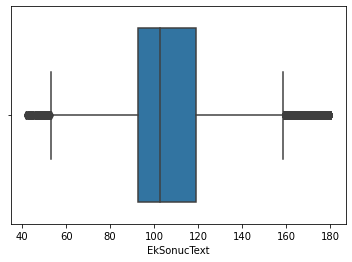

In [60]:
#Outlier Degerlerin Kaldırılması - EkSonucText
import seaborn as sns
sns.boxplot(x = "EkSonucText", data = data)

In [61]:
from collections import Counter
aykiri_indexler=[]

Q1 = data["EkSonucText"].quantile(0.25)
Q3 = data["EkSonucText"].quantile(0.75)
IQR = Q3 -Q1
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR
filtre = ((data["EkSonucText"] < alt_sinir) | (data["EkSonucText"] > ust_sinir))
aykiri_gozlemler = data["EkSonucText"][filtre]
aykiri_index = aykiri_gozlemler.index
aykiri_indexler.extend(aykiri_index)
aykiri_indexler = Counter(aykiri_indexler)

In [62]:
data = data.drop(aykiri_indexler,axis=0).reset_index(drop=True)

<AxesSubplot:xlabel='YatisGun'>

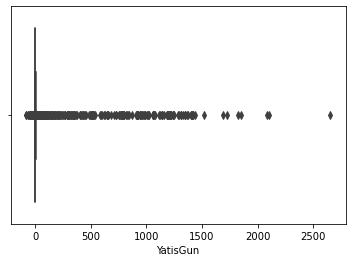

In [63]:
#Outlier Degerlerin Kaldırılması - YatisGun
import seaborn as sns
sns.boxplot(x = "YatisGun", data = data)

In [64]:
from collections import Counter
aykiri_indexler=[]

Q1 = data["YatisGun"].quantile(0.25)
Q3 = data["YatisGun"].quantile(0.75)
IQR = Q3 -Q1
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR
filtre = ((data["YatisGun"] < alt_sinir) | (data["YatisGun"] > ust_sinir))
aykiri_gozlemler = data["YatisGun"][filtre]
aykiri_index = aykiri_gozlemler.index
aykiri_indexler.extend(aykiri_index)
aykiri_indexler = Counter(aykiri_indexler)

In [65]:
data = data.drop(aykiri_indexler,axis=0).reset_index(drop=True)

In [66]:
data.shape

(39636, 12)

In [67]:
## StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = data.drop(["Target"], axis = 1)
a = sc.fit_transform(x)

In [68]:
y = data["Target"].values

In [69]:
# Lojistik Regresyon ile modelimizi oluşturuyoruz.
import statsmodels.api as sm

logit_model=sm.Logit(y,a)

result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.315318
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.412     
Dependent Variable: y                AIC:              25017.8654
Date:               2021-07-30 15:29 BIC:              25112.3278
No. Observations:   39636            Log-Likelihood:   -12498.   
Df Model:           10               LL-Null:          -21271.   
Df Residuals:       39625            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1         0.0318     0.0163    1.9476   0.0515   -0.0002    0.0637
x2         0.0693     0.0170    4.0791   0.0000    0.0360 

p-value değerine göre anlamlı olan değişkenlerin katsayı değeri alınmıştır.

In [70]:
list_ = [0.0318, 0.0693, 1.9493, 0.1127, 0.5333, 30.9019, 0.0481]

In [71]:
data.columns

Index(['CinsiyetId', 'GelisTipi', 'EkSonucText', 'YatisGun', 'Target',
       'HiperTansiyon', 'Obezite', 'Büyük_Tansiyon', 'Kücük_Tansiyon',
       'Yas_Sinif_ergen', 'Yas_Sinif_genç', 'Yas_Sinif_orta yaş'],
      dtype='object')

In [72]:
# Anlamlı olmayan değişkenler çıkarılmıştır.
columns = ["Büyük_Tansiyon", "Yas_Sinif_ergen", "Yas_Sinif_genç", "Yas_Sinif_orta yaş", "Target"]

yeni_data = data.drop(columns, axis = 1)
yeni_data

,CinsiyetId,GelisTipi,EkSonucText,YatisGun,HiperTansiyon,Obezite,Kücük_Tansiyon
0,0,1,112.1,0.0,0,0,1
1,0,1,109.9,0.0,0,0,1
2,0,1,92.6,1.0,0,0,1
3,1,1,89.5,0.0,0,0,1
4,0,1,119.6,1.0,0,0,1
...,...,...,...,...,...,...,...
39631,1,1,141.0,3.0,0,0,2
39632,1,1,93.0,0.0,0,0,2
39633,1,1,97.0,0.0,0,0,1
39634,1,1,83.0,1.0,0,0,1


In [73]:
sc = StandardScaler()
a = sc.fit_transform(yeni_data)

In [74]:
# Veri setindeki her bir değer ile katsayı değerleri çarpılıp toplanmıştır.
son = pd.DataFrame(a)
son_frame = son.abs() * list_
eklenecek = son_frame.sum(axis = 1)
eklenecek = eklenecek.astype(int)
data["Risk_Grubu"] = eklenecek

data["Risk_Grubu"].value_counts()

3      13409
2      10622
4       7961
5       3864
6       2152
7       1216
8        174
9         80
489       72
490       40
491       14
492       10
488        9
493        7
495        4
494        2
Name: Risk_Grubu, dtype: int64

Risk grup değerleri ile target değerleri incelenip ona göre risk grubu etiketlendirilmiştir.

In [75]:
data["Risk_Grubu_Etiket"] = None
for i in range(len(data)):
    if (data["Risk_Grubu"][i] == 2 or data["Risk_Grubu"][i] == 3):
        data["Risk_Grubu_Etiket"][i] = "Düsük Risk Grubu"
    elif (data["Risk_Grubu"][i] == 4):
        data["Risk_Grubu_Etiket"][i] = "Orta Risk Grubu"
    else:
        data["Risk_Grubu_Etiket"][i] = "Yüksek Risk Grubu"

In [76]:
data["Risk_Grubu_Etiket"].value_counts()

Düsük Risk Grubu     24031
Orta Risk Grubu       7961
Yüksek Risk Grubu     7644
Name: Risk_Grubu_Etiket, dtype: int64

<AxesSubplot:xlabel='Risk_Grubu_Etiket', ylabel='count'>

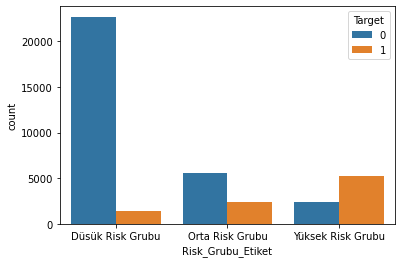

In [77]:
sns.countplot(x = "Risk_Grubu_Etiket", hue = "Target", data = data)

In [78]:
data.groupby(["Risk_Grubu_Etiket", "Target"])["Target"].count()

Risk_Grubu_Etiket  Target
Düsük Risk Grubu   0         22660
                   1          1371
Orta Risk Grubu    0          5573
                   1          2388
Yüksek Risk Grubu  0          2372
                   1          5272
Name: Target, dtype: int64